In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
from pathlib import Path

/tmp/ipykernel_279/1833747114.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('DATA/Adopciones.csv')
df.head(1)

,Reporte,Periodo,Institucion,Solicitudes Recibidas,Solicitudes en Trámite,Adopciones Improcedentes,Adopciones Concedidas,Femenino,Masculino,0-4y F,...,5-8y M,Total M,Origen,Receptor,Solicitudes de adopción con resolución sobre la no emisión del Certificado de Idoneidad,9-18y F,9-13y M,14-18 M,Year,Semestre
0,Nacional,Enero-Junio 2014,DIF Nacional,7,39,12.0,3.0,1.0,2.0,1.0,...,1.0,2.0,Distrito Federal,Distrito Federal,NaN,1.0,0.0,0.0,2014,1


In [3]:
df.describe()

,Solicitudes Recibidas,Solicitudes en Trámite,Adopciones Improcedentes,Adopciones Concedidas,Femenino,Masculino,0-4y F,5-8y F,Total F,0-4y M,5-8y M,Total M,9-18y F,9-13y M,14-18 M,Year,Semestre
count,40.000000,40.000000,40.000000,40.000000,39.000000,39.000000,38.000000,38.000000,39.000000,38.000000,38.000000,39.000000,39.000000,38.000000,38.000000,40.000000,40.00000
mean,16.525000,24.150000,3.025000,0.900000,1.794872,1.769231,0.447368,1.052632,1.692308,0.736842,0.868421,1.846154,0.538462,0.210526,0.026316,2018.500000,1.50000
std,20.197725,24.685249,8.122421,1.997434,1.908147,2.851237,0.685659,1.293380,1.893949,1.446042,1.318702,2.870343,0.554700,0.474079,0.162221,2.908872,0.50637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.00000
25%,2.000000,2.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.00000
50%,5.500000,9.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2018.500000,1.50000
75%,25.000000,45.250000,0.250000,1.000000,3.000000,1.500000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2021.000000,2.00000
max,64.000000,86.000000,35.000000,10.000000,6.000000,12.000000,2.000000,5.000000,6.000000,6.000000,5.000000,12.000000,2.000000,2.000000,1.000000,2023.000000,2.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 23 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Reporte                                                                                  40 non-null     object 
 1   Periodo                                                                                  40 non-null     object 
 2   Institucion                                                                              40 non-null     object 
 3   Solicitudes Recibidas                                                                    40 non-null     int64  
 4   Solicitudes  en Trámite                                                                  40 non-null     int64  
 5   Adopciones Improcedentes                                          

In [5]:
df_nacional = df.loc[df['Reporte'] == 'Nacional']
df_nacional.head(2)

,Reporte,Periodo,Institucion,Solicitudes Recibidas,Solicitudes en Trámite,Adopciones Improcedentes,Adopciones Concedidas,Femenino,Masculino,0-4y F,...,5-8y M,Total M,Origen,Receptor,Solicitudes de adopción con resolución sobre la no emisión del Certificado de Idoneidad,9-18y F,9-13y M,14-18 M,Year,Semestre
0,Nacional,Enero-Junio 2014,DIF Nacional,7,39,12.0,3.0,1.0,2.0,1.0,...,1.0,2.0,Distrito Federal,Distrito Federal,NaN,1.0,0.0,0.0,2014,1
2,Nacional,Julio-Diciembre 2014,DIF Nacional,32,50,7.0,10.0,2.0,8.0,0.0,...,5.0,8.0,Distrito Federal,Distrito Federal,NaN,1.0,0.0,0.0,2014,2


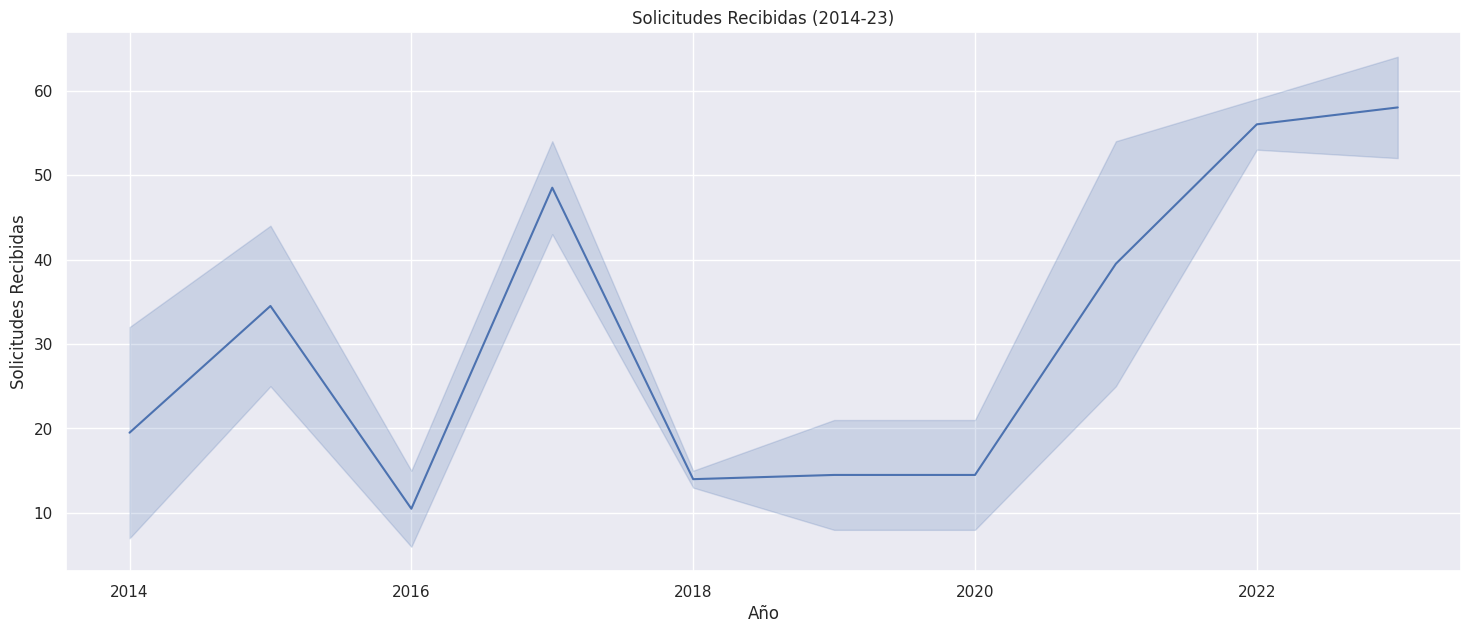

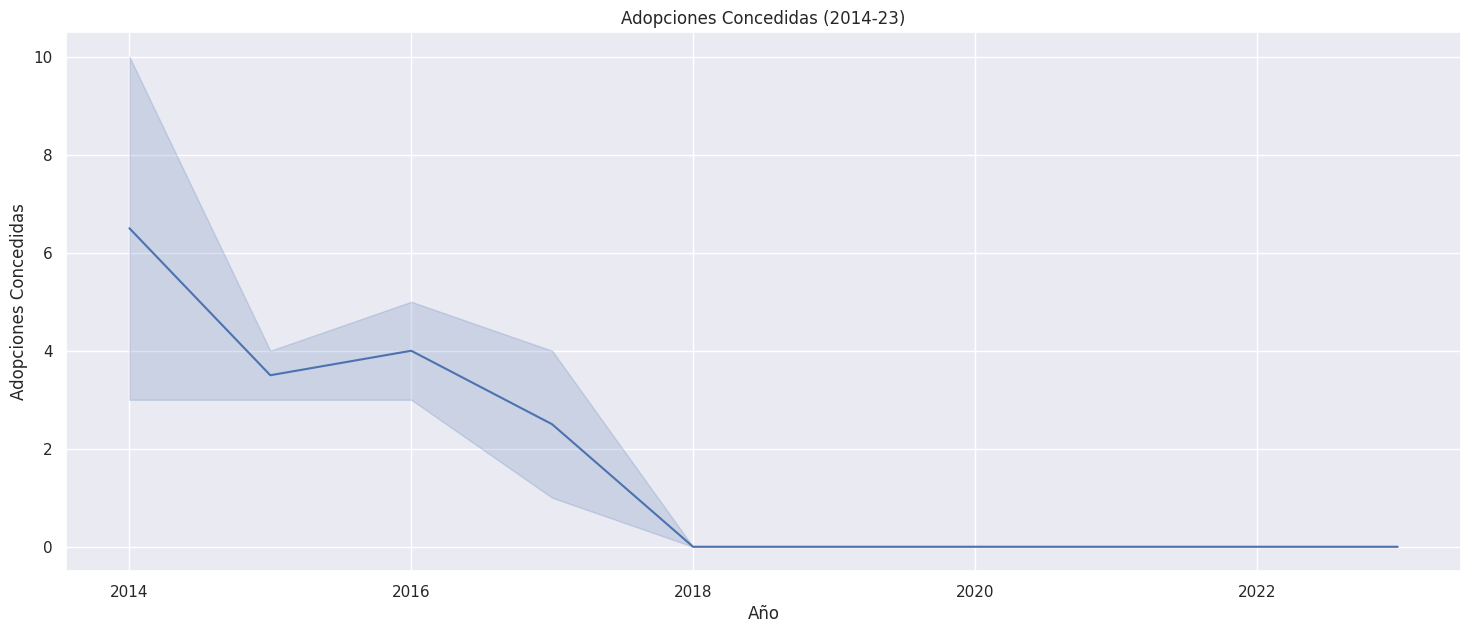

In [19]:
sns_pallete = sns.color_palette('dark')
columns =["Solicitudes Recibidas", "Adopciones Concedidas"]
for col in columns:
    plt.figure(figsize=(18,7))
    plt.title('{} (2014-23)'.format(col))
    plt.xlabel('Año')
    ax = sns.lineplot(x='Year', y=col, data=df_nacional)
    ax.figure.savefig('Img/{}.png'.format(col))
    

In [7]:
example = list(df_nacional.Femenino) + list(df_nacional['Masculino '])
genero = ['F'] * len(df_nacional.Femenino) + ['M'] * len(df_nacional['Masculino '])

df_genero = pd.DataFrame(data={
    'Data': example,
    'Genero': genero
})

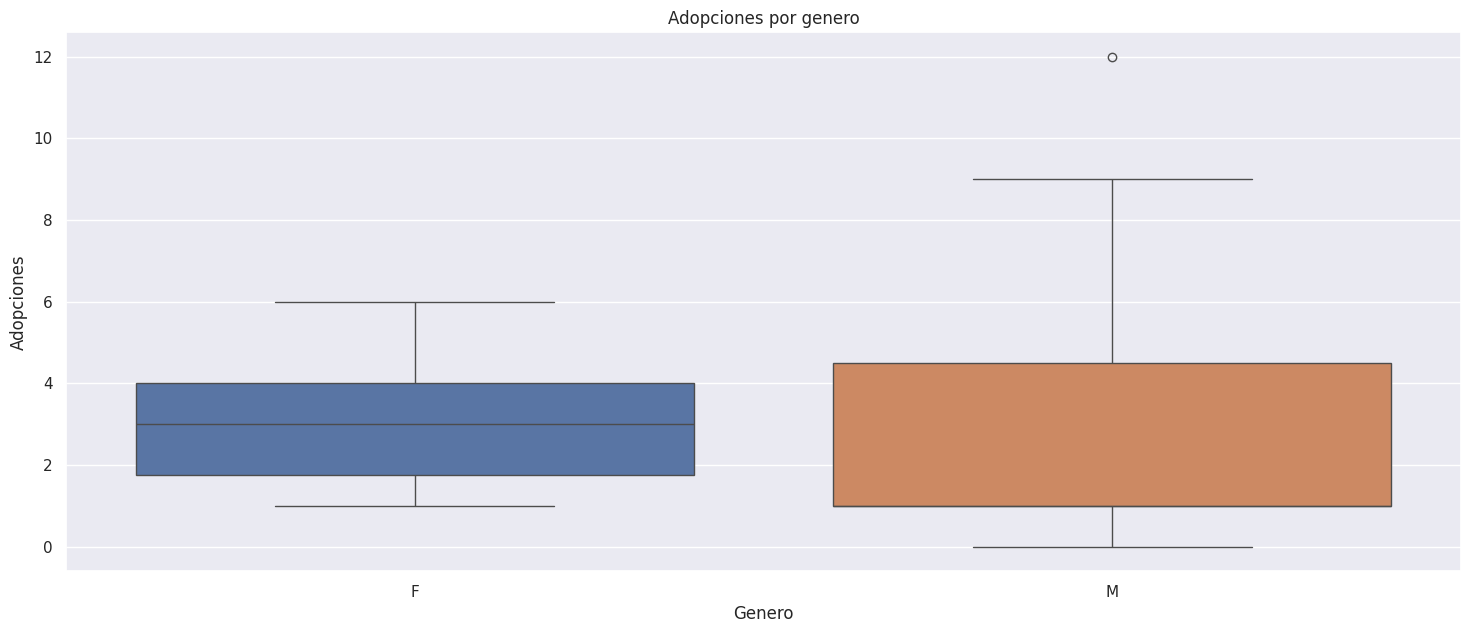

In [21]:
plt.figure(figsize=(18,7))
plt.title('Adopciones por genero')
plt.ylabel('Adopciones')
fig = sns.boxplot(x='Genero', y='Data', data=df_genero, hue='Genero')
fig.figure.savefig('Img/Adopciones por genero')

In [9]:
df_nacional =df_nacional.rename(columns={'14-18 M': '14-18y M'})
df_nacional.head(1)

,Reporte,Periodo,Institucion,Solicitudes Recibidas,Solicitudes en Trámite,Adopciones Improcedentes,Adopciones Concedidas,Femenino,Masculino,0-4y F,...,5-8y M,Total M,Origen,Receptor,Solicitudes de adopción con resolución sobre la no emisión del Certificado de Idoneidad,9-18y F,9-13y M,14-18y M,Year,Semestre
0,Nacional,Enero-Junio 2014,DIF Nacional,7,39,12.0,3.0,1.0,2.0,1.0,...,1.0,2.0,Distrito Federal,Distrito Federal,NaN,1.0,0.0,0.0,2014,1


In [10]:
df_nacional['9-18y M'] = df_nacional[['14-18y M', '9-13y M']].sum(axis=1)

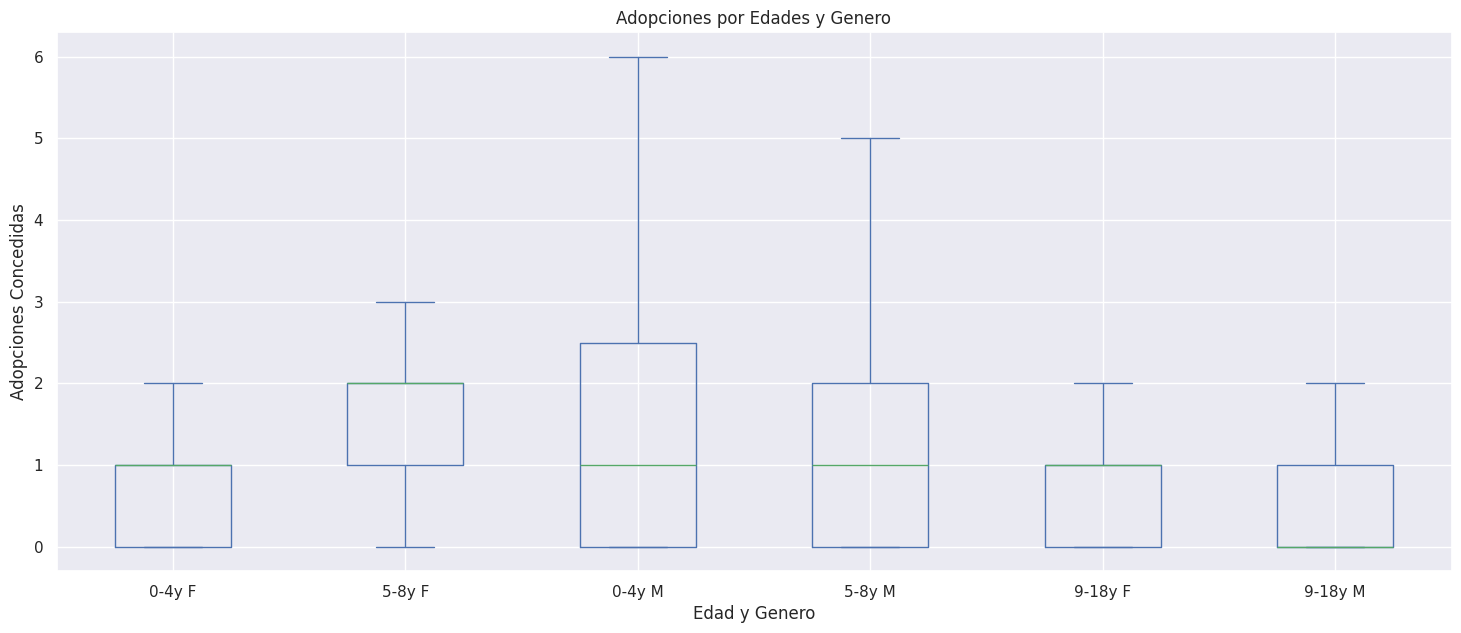

In [26]:
columns = ['0-4y F', '5-8y F', '0-4y M', '5-8y M', '9-18y F', '9-18y M']

fig =df_nacional[columns].plot(kind='box', figsize=(18,7), title="Adopciones por Edades y Genero", 
                              ylabel="Adopciones Concedidas", xlabel="Edad y Genero").get_figure()

fig.savefig('Img/Adopciones por edades y genero.png')